<h2 style="text-align: center; font-size: 30px; text-align: center; margin-bottom: 40px;">Trabajo Final</h2>

<div style="border: 1px solid #d2d2d2; border-top: none; border-radius: 8px; margin-bottom: 40px;">
    <h2 style="text-align: center; font-weight: bold; font-size: 20px; padding: 10px 20px; background-color: #38a2ad; color: #fff; border-radius: 4px; margin-bottom: 20px; margin-top: 0; border-bottom-left-radius: 0;  border-bottom-right-radius: 0;">Alumnos</h2>
    <div style="width: 450px; margin: 0 auto 30px;">
        <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 18px; font-weight: bold; color: #363636; line-height: 40px;">Nombre y Apellido</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 18px; font-weight: bold; color: #363636; line-height: 40px;">Padrón</p>
            </div>
        </div>
        <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">Maria Florencia Prado</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">96626</p>
            </div>
        </div>
         <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2; ">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">Matías Rozanec</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">97404</p>
            </div>
        </div>
        
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt


import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

import warnings
warnings.filterwarnings("ignore")

In [2]:
apps = pd.read_csv('data/AppleStore.csv')
desc = pd.read_csv('data/appleStore_description.csv')

Con millones de aplicaciones en la actualidad, el siguiente conjunto de datos se ha convertido en la clave para obtener las mejores aplicaciones en la tienda de aplicaciones iOS. Este conjunto de datos contiene más de 7000 detalles de aplicaciones móviles de Apple iOS. Los datos se extrajeron de la API de búsqueda de iTunes en el sitio web de Apple Inc.

Fecha de recolección de datos (de API); Julio 2017

Dimensión del conjunto de datos; 7197 filas y 18 columnas (17 columnas + 1 de descripcion que está en un archivo aparte).


In [3]:
apps.shape

(7197, 17)

In [4]:
apps.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

vpp_lic: *The Apple Volume Purchase Program (VPP) is a service that allows organizations that have registered for the Apple VPP to purchase iOS apps in bulk, but not at discounted prices.* 


*After making a bulk purchase, the organization receives redemption codes for each app bought. The organization can then distribute app codes to individual users, who use the codes to "purchase" the app from the Apple App Store.*

source: https://searchmobilecomputing.techtarget.com/definition/Apple-Volume-Purchase-Program-Apple-VPP

In [5]:
# borramos la primer columna, Unnamed: 0, que en el file original funciona como indice
apps.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
apps.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [7]:
# remove repeated columns from description file
desc.drop(['track_name','size_bytes'], axis=1,inplace=True)

In [8]:
desc.head()

,id,app_desc
0,281656475,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Let Evernote change the way you organize your ...
2,281940292,Download the most popular free weather app pow...
3,282614216,The eBay app is the best way to find anything ...
4,282935706,On more than 250 million devices around the wo...


## Análisis de categorias

Text(0.5, 1.0, 'Genres count')

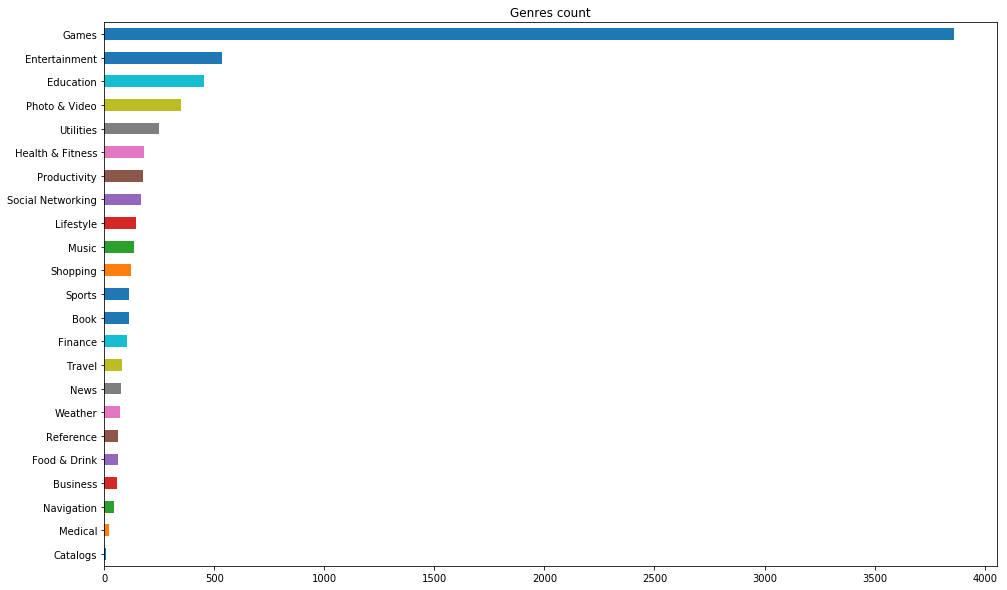

In [9]:
apps.prime_genre.value_counts(ascending=True).plot(kind='barh', figsize=(16,10)).set_title('Genres count')

Text(0.5, 1.0, 'Genres excluding games')

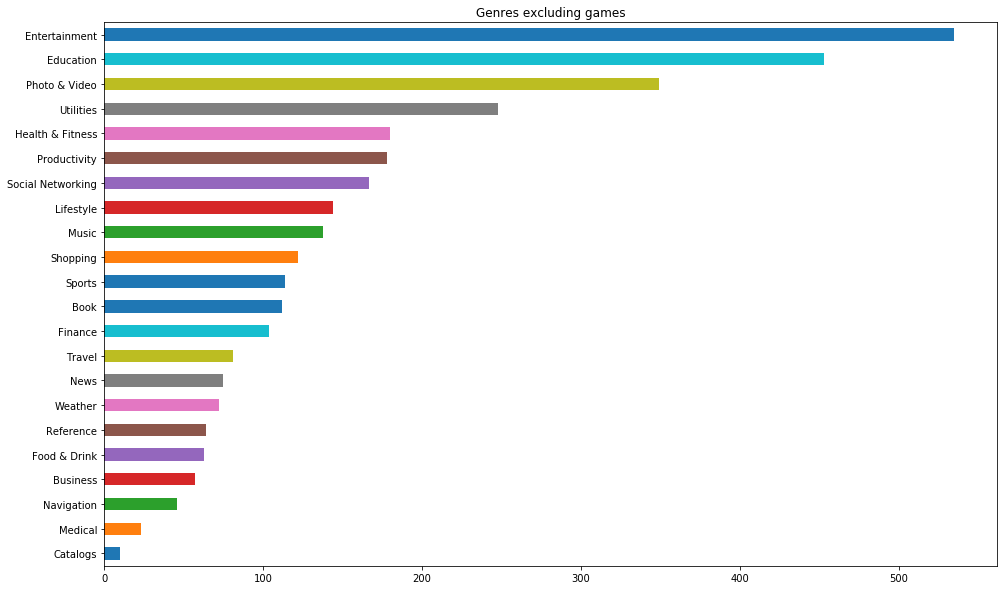

In [10]:
#mismo plot filtrando games
apps[apps['prime_genre'] != 'Games'].prime_genre.value_counts(ascending=True).plot(kind='barh', figsize=(16,10)).set_title('Genres excluding games')

## Analisis de precios

In [11]:
apps.currency.value_counts()

USD    7197
Name: currency, dtype: int64

Como todos los precios estan en USD, se puede descartar esta columna.

In [12]:
apps.drop('currency', axis=1, inplace=True)

## Apps pagas vs gratuitas

Text(0.5, 1.0, 'Cantidad de Aplicaciones Pagas y Gratis ')

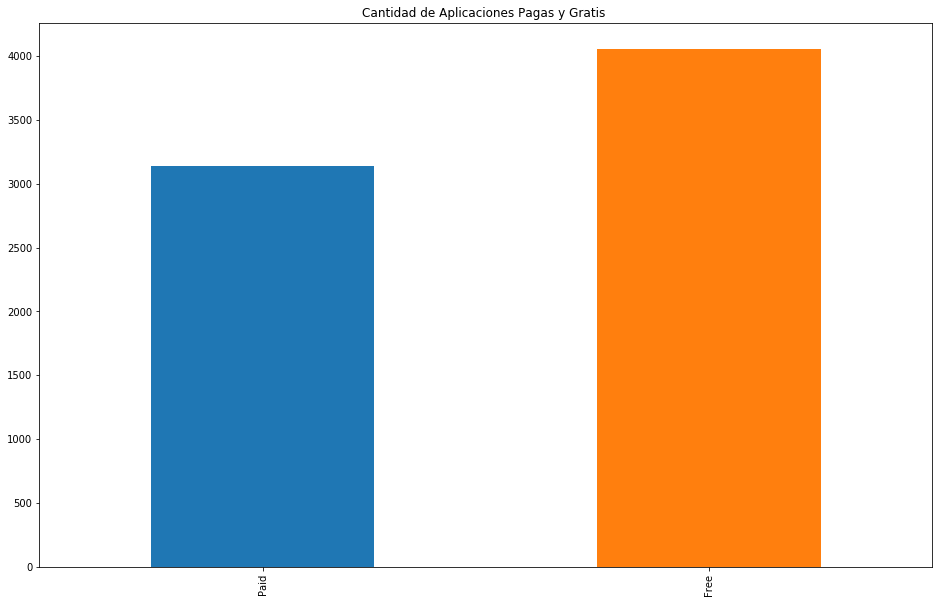

In [13]:
def paid(x):
    if x>0:
        return 'Paid'
    else :
        return'Free'

apps['category']= apps.price.apply(lambda x : paid(x))

apps['category'].value_counts(ascending=True).plot(kind='bar', figsize=(16,10)).set_title('Cantidad de Aplicaciones Pagas y Gratis ')

Text(0.5, 1.0, 'Aplicaciones pagas por categoria')

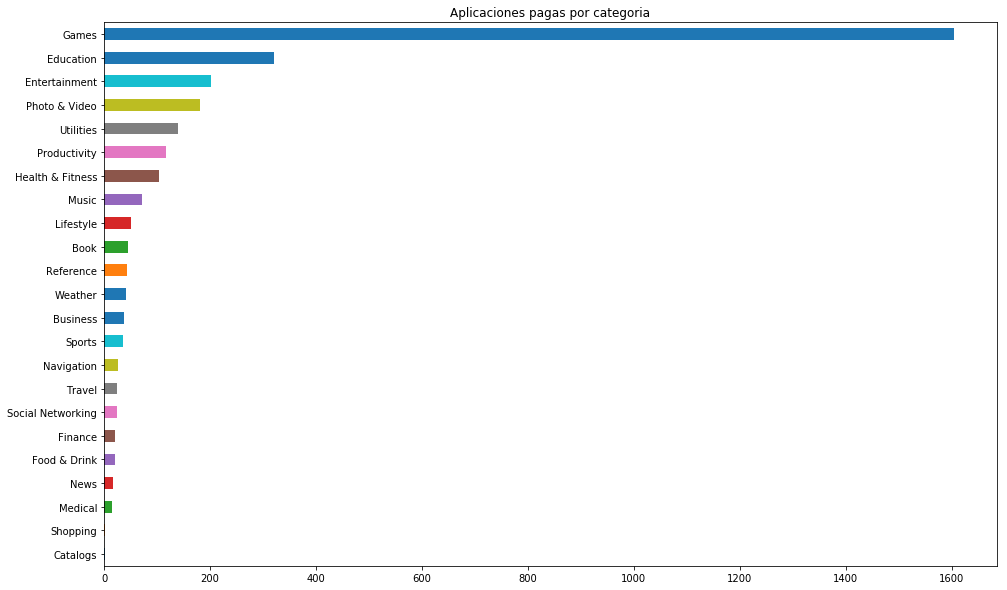

In [14]:
# plot generos de apps pagas
apps[apps['price'] > 0].prime_genre.value_counts(ascending=True).plot(kind='barh', figsize=(16,10)).set_title('Aplicaciones pagas por categoria')

Cantidad de aplicaciones pagas por categoría

Text(0.5, 1.0, 'Aplicaciones gratis por categoria')

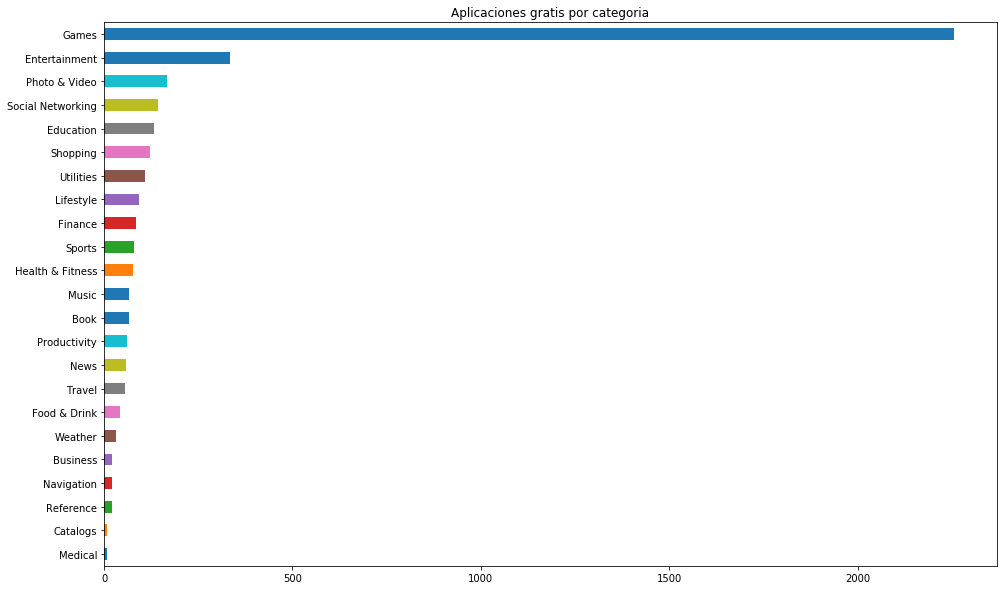

In [15]:
# plot generos de apps gratis
apps[apps['price'] == 0].prime_genre.value_counts(ascending=True).plot(kind='barh', figsize=(16,10)).set_title('Aplicaciones gratis por categoria')

Cantidad de aplicaciones gratis por categoría

Text(0.5, 1.0, 'Aplicaciones gratis por categoria, excluyendo Games ')

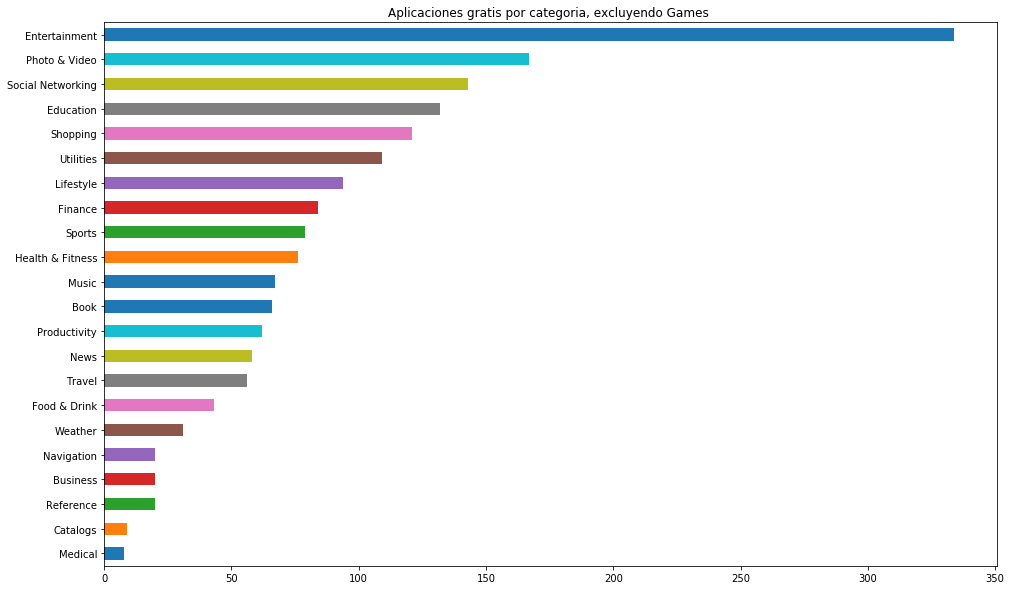

In [16]:
# mismo plot filtrando games
apps[(apps['price'] == 0) & (apps['prime_genre'] != 'Games')].prime_genre.value_counts(ascending=True).plot(kind='barh', figsize=(16,10)).set_title('Aplicaciones gratis por categoria, excluyendo Games ')

Cantidad de aplicaciones gratis por categoría filtrando games

Text(0.5, 1.0, 'Aplicaciones pagas por categoria, excluyendo Games')

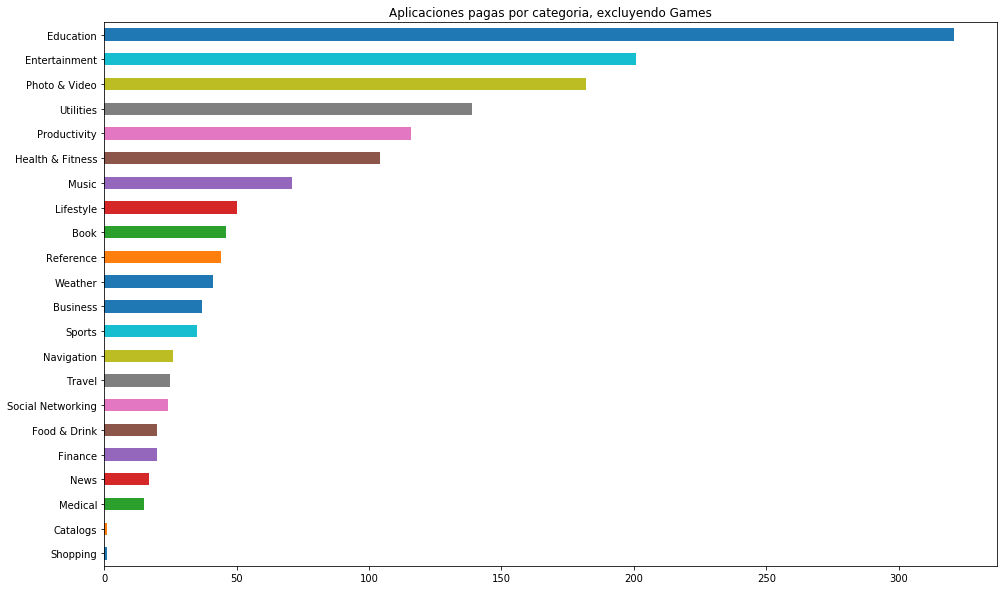

In [17]:
# mismo plot filtrando games
apps[(apps['price'] > 0) & (apps['prime_genre'] != 'Games')].prime_genre.value_counts(ascending=True).plot(kind='barh', figsize=(16,10)).set_title('Aplicaciones pagas por categoria, excluyendo Games')

Cantidad de aplicaciones pagas por categoria filtrando games

In [18]:
s = ['Games', 'Entertainment', 'Education', 'Photo & Video']

def categ(x):
    if x in s:
        return x
    else : 
        return "Others"

apps['broad_genre']= apps.prime_genre.apply(lambda x : categ(x))

In [19]:
free = apps[apps.price==0].broad_genre.value_counts().sort_index().to_frame()
paid = apps[apps.price>0].broad_genre.value_counts().sort_index().to_frame()
total = apps.broad_genre.value_counts().sort_index().to_frame()
free.columns=['Gratis']
paid.columns=['Pagas']
total.columns=['Total']
dist = free.join(paid).join(total)
dist ['Porcentaje Pagas %'] = dist.Pagas*100/dist.Total
dist ['Porcentaje Gratis %'] = dist.Gratis*100/dist.Total
dist

,Gratis,Pagas,Total,Porcentaje Pagas %,Porcentaje Gratis %
Education,132,321,453,70.860927,29.139073
Entertainment,334,201,535,37.570093,62.429907
Games,2257,1605,3862,41.558778,58.441222
Others,1166,832,1998,41.641642,58.358358
Photo & Video,167,182,349,52.148997,47.851003


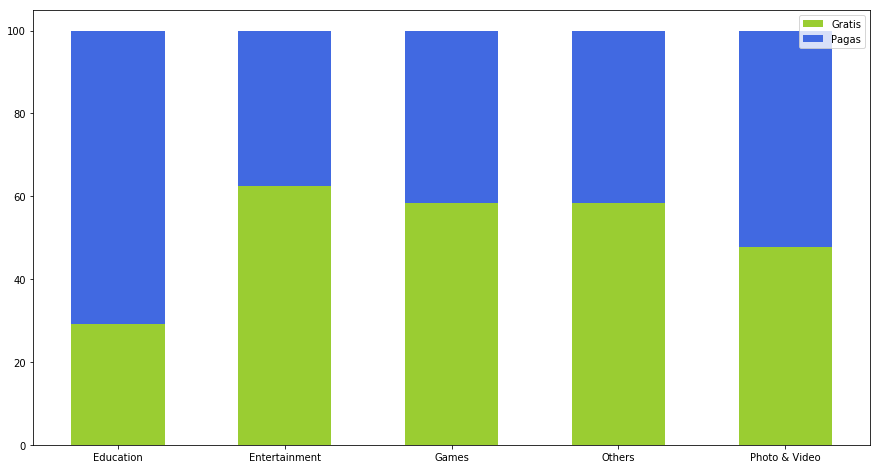

In [20]:
list_free= dist['Porcentaje Gratis %'].tolist()
tuple_free = tuple(list_free)
tuple_paidapps = tuple(dist['Porcentaje Pagas %'].tolist())
plt.figure(figsize=(15,8))
N=5
ind = np.arange(N)   
width =0.56   
p1 = plt.bar(ind, tuple_free, width, color='#9ACD32')
p2 = plt.bar(ind, tuple_paidapps, width,bottom=tuple_free,color='#4169E1')
plt.xticks(ind,tuple(dist.index.tolist() ))
plt.legend((p1[0], p2[0]), ('Gratis', 'Pagas'))
plt.show()

pies = dist[['Porcentaje Gratis %','Porcentaje Pagas %']]
pies.columns=['free %','paid %']
plt.show()

Vemos que para la única categoría que la cantidad de aplicaciones pagas supera a la cantidad de aplicaciones no pagas es Eduación



Text(0.5, 1.0, 'Cantiadd de aplicaciones por precios')

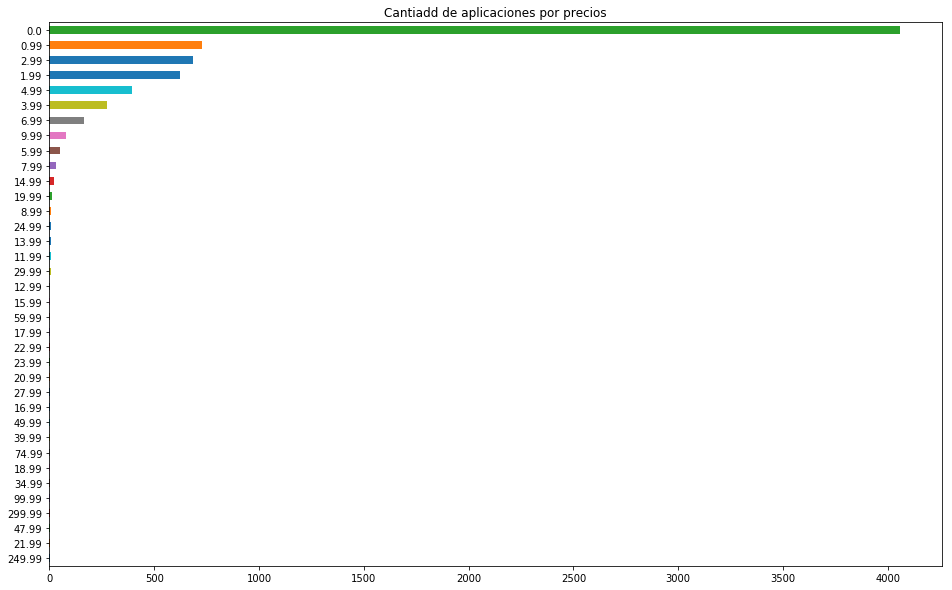

In [21]:
apps.price.value_counts(ascending=True).plot(kind='barh', figsize=(16,10)).set_title('Cantiadd de aplicaciones por precios')

Como se puede ver, la gran mayoría de apps son gratis; de las pagas los precios van hasta los USD 10, a partir de ahí ya hay muy pocos casos como para generalizar.

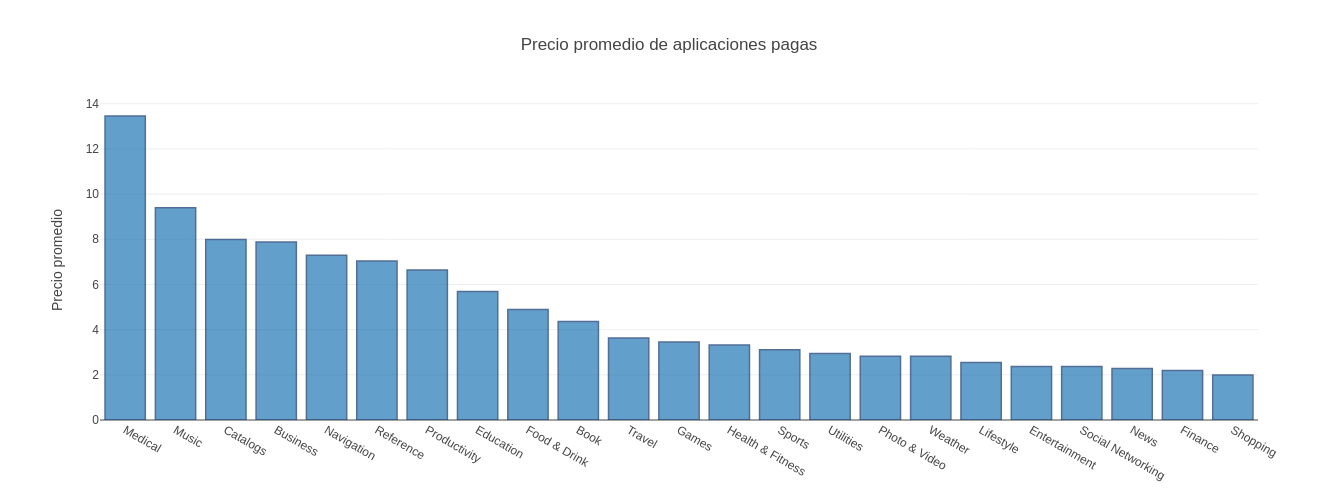

In [22]:
apps['isNotFree'] = apps['price'].apply(lambda x: 1 if x > 0 else 0)
df_app_notfree = apps[apps['isNotFree'] == 1]
df_app_free = apps[apps['isNotFree'] == 0]
cnt_srs = df_app_notfree[['prime_genre', 'price']].groupby('prime_genre').mean()['price'].sort_values(ascending=False)
text = ['{:.2f}%'.format(100 * (value / cnt_srs.sum())) for value in cnt_srs.values]

trace = go.Bar(
    x = cnt_srs.index,
    y = cnt_srs.values,
    text = text,
    marker = dict(
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)
data = [trace]

layout = go.Layout(
    title = 'Precio promedio de aplicaciones pagas',
    margin = dict(
        l = 100
    ),
    yaxis = dict(
        title = 'Precio promedio'
    ),
    width = 800,
    height = 500
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Dentro de las aplicaciones pagas, las aplicaciones Medicas son las mas caras, con un promedio de casi 14 dolares. 
Y si analizamos aquellas categorías con mayor cantidad de aplicaciones en el store mantienen precios menores a 6 dólares en promedio, como lo son Games, Entretainment, Education y  Photo & Video

## User ratings
---
Una vez analizadas la cantidad de aplicaciones pagas y gratis por categoría nos preguntamos si las aplicaciones pagas son realmente buenas. Esto lo vamos a analizar siguiendo la opinión de los usuarios.

El campo que define la opinion de los usuarios es USER RATING, que tiene valores entre 0 y 5, siendo 5 la mejor puntuacion.

In [23]:
s = ['Games', 'Entertainment', 'Education', 'Photo & Video', 'Social Networking']

def categ(x):
    if x in s:
        return x
    else : 
        return "Others"

apps['broad_genre']= apps.prime_genre.apply(lambda x : categ(x))


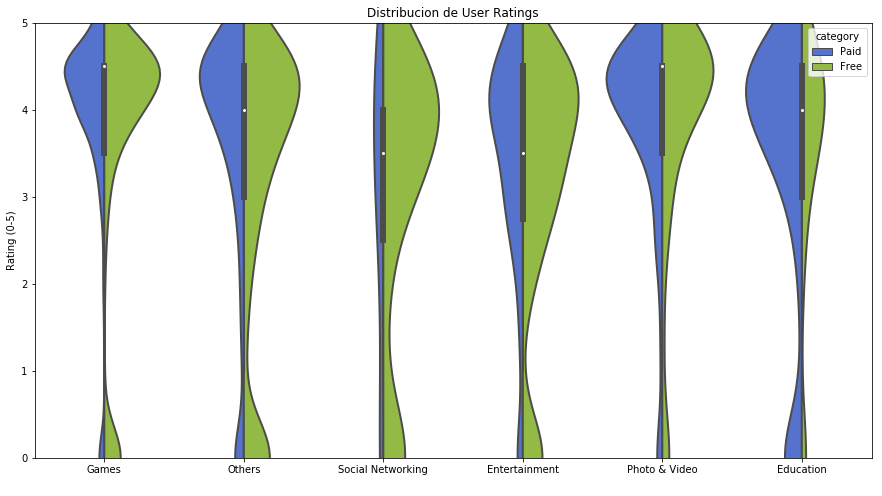

In [24]:
plt.figure(figsize=(15,8))
plt.style.use('fast')
plt.ylim([0,5])
plt.title("Distribucion de User Ratings")
sns.violinplot(data=apps, y ='user_rating',x='broad_genre',hue='category',
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#4169E1','#9ACD32'])
plt.xlabel(" ")
plt.ylabel("Rating (0-5)")

plt.show()

Los resultados varían parecido en el caso de las apps pagas y de las gratuitas. En general vemos que la distribución de las puntuaciones de usuarios son parecidas en todas las categorías. 

Se puede destacar que para el caso de `entretenimiento` y `otros` sí se aprecian puntuaciones entre 1 y 2, mientras que en el resto de las categorías las puntuaciones más presentes son 0 y luego entre 3 y 5, generalmente los valores entre 1 y 2 son poco usados. De todos modos las distribuciones son parecidas tanto para pagas como no pagas.

Se puede notar que en las apps pagas, en el género *Education* hay mayor concentración en la puntuación 4 para las pagas, mientras que para las no pagas, entre los valors 3 y 5, la distribuión es mas pareja.

La mayoría de apps relacionadas a Redes sociales por amplia diferencia es gratis. No sería popular tener que pagar por una red social; ademas las redes sociales generan ingresos mediante publicidades, por lo que conviene tener una base amplia de usuarios, por más que eso signifique que ellos estén 'gratis'.


No perder de vista que todas las apps también pueden generar ingresos mediante *in app purchases*. 


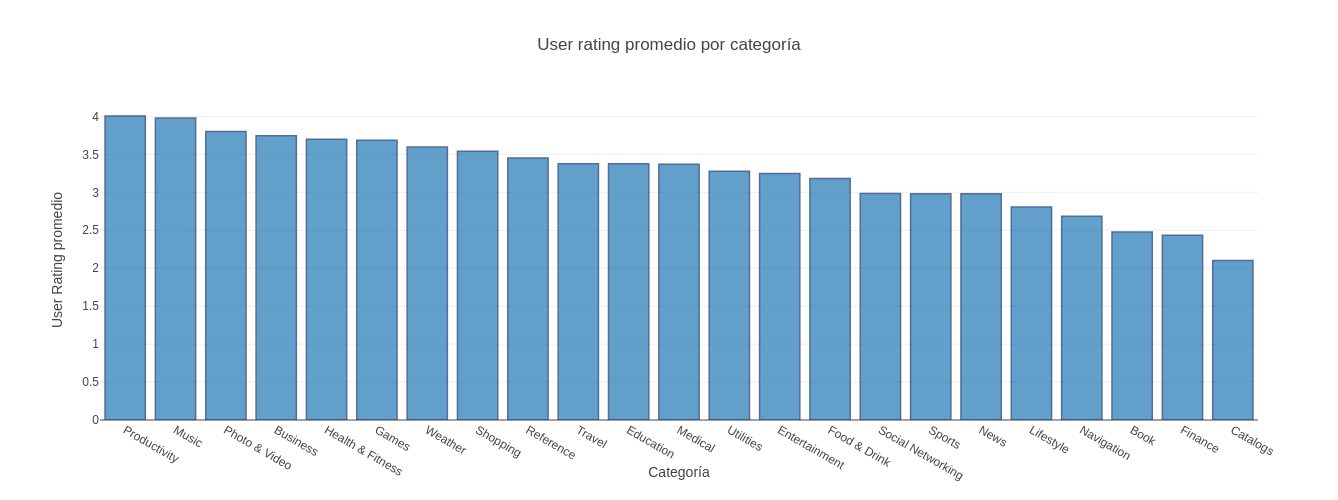

In [25]:
cnt_srs = apps[['prime_genre', 'user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False)

trace = go.Bar(
    x = cnt_srs.index,
    y = cnt_srs.values,
    marker = dict(
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)
data = [trace]

layout = go.Layout(
    title = 'User rating promedio por categoría',
    margin = dict(
        l = 100
    ),
    xaxis = dict(
        title = 'Categoría'
    ),
    yaxis = dict(
        title = 'User Rating promedio'
    ),
    width = 800,
    height = 500
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Text(0.5, 1.0, 'Average user rating per genre')

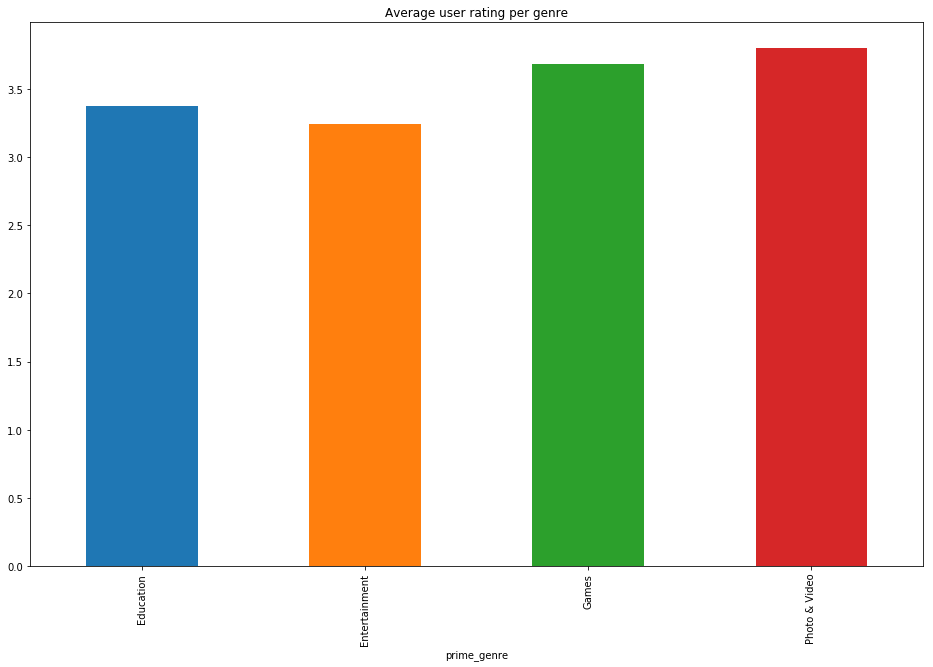

In [26]:
interest_areas =  ['Games', 'Entertainment', 'Education', 'Photo & Video']
apps[apps.prime_genre.isin(interest_areas)].groupby('prime_genre')['user_rating'].mean().plot(kind='bar', figsize=(16,10)).set_title('Average user rating per genre')

### cont_rating

Text(0.5, 1.0, 'A que publico estan orientadas las apps?')

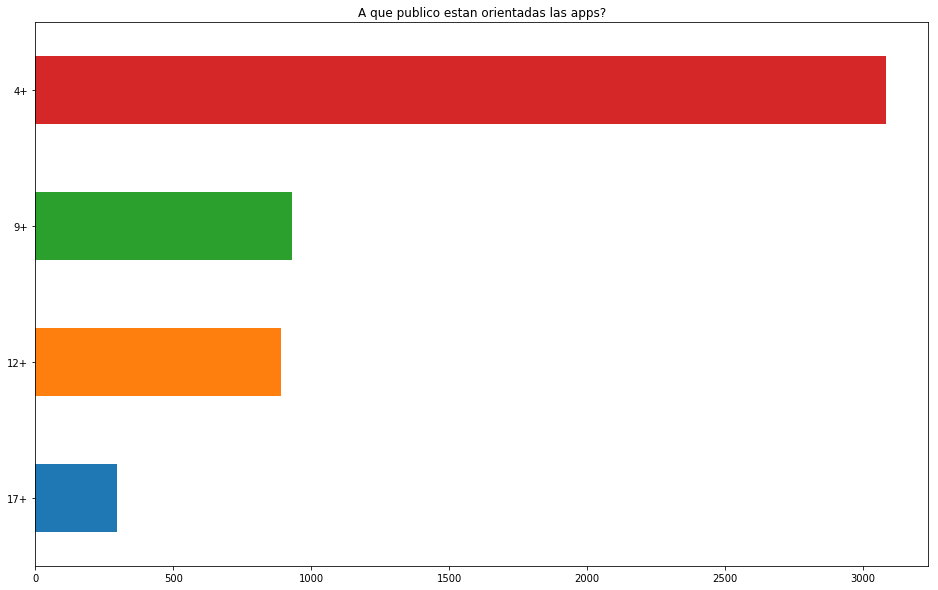

In [27]:

# veamos los ratings de contenido de las areas de interes
apps[apps['prime_genre'].isin(interest_areas)].cont_rating.value_counts(ascending=True).plot(kind='barh', figsize=(16,10)).set_title('A que publico estan orientadas las apps?')

La columna de rating edad se transforma en feature numérico, ya que no tiene sentido que sea del tipo _object_.

In [28]:
apps.cont_rating = apps.cont_rating.apply(lambda x: int(x.split('+')[0]))

### track_name

In [29]:
apps.track_name = apps.track_name.apply(lambda x: x.lower())

### ver

Nos quedamos con la *major version* de las apps.

In [30]:
# for Apple versioning criteria, see: https://en.wikipedia.org/wiki/Software_versioning#Apple
apps['major_version'] = apps.ver.apply(lambda x: x.split('.')[0])

Text(0.5, 1.0, 'version numbers')

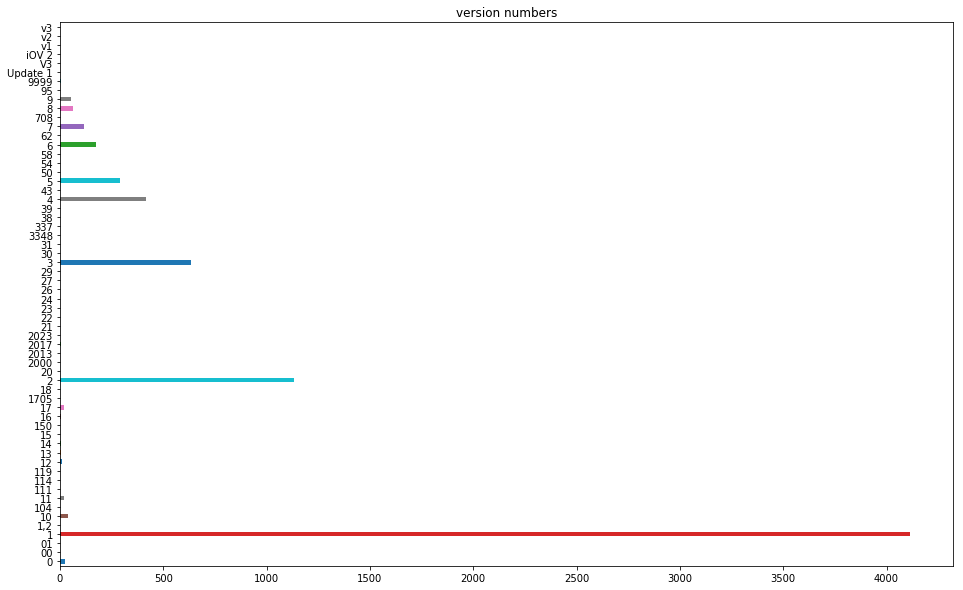

In [31]:
apps.major_version.value_counts(ascending=True).sort_index().plot(kind='barh', figsize=(16,10)).set_title('version numbers')

Se observan versiones un poco raras.... como `1,2` o `iOV2`, `9999`, `2000`.... no es posible que esto sean numeros de versiones reales.

Mas alla de eso, la gran mayoria esta en su primera version, llegando hasta la 9. Mas alla de la 9

In [32]:
# pasaje a mayor version a numerico descartando los registros que no son validos. 
# Consideramos que los registros que no tienen nro de version valido, no se pueden considerar seriamente para un analisis.
apps.loc[:,'major_version'] = pd.to_numeric(apps['major_version'], errors='coerce')
apps = apps.dropna(subset=['major_version'])
apps.loc[:,'major_version'] = apps['major_version'].astype('int')

Text(0.5, 1.0, 'Número de versión hasta 10')

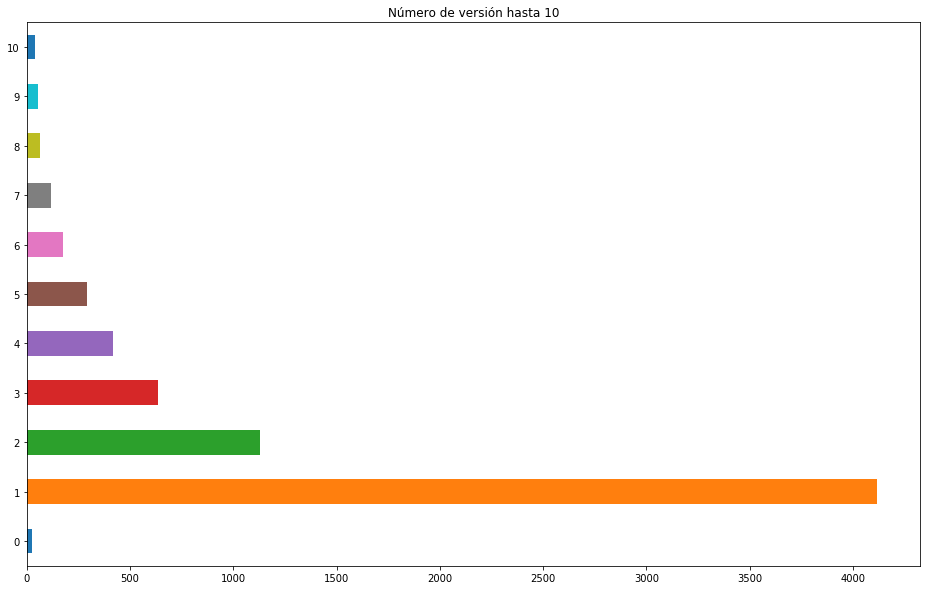

In [33]:
apps[apps['major_version'].isin(range(11))].major_version.value_counts(ascending=True).sort_index().plot(kind='barh', figsize=(16,10)).set_title('Número de versión hasta 10')

# Merge datasets

In [34]:
# se hace left join porque importan solamente los registros que estan en apps df
m = apps.merge(desc, how='left')

In [35]:
m.head()

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,category,broad_genre,isNotFree,major_version,app_desc
0,281656475,pac-man premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4,Games,38,5,10,1,Paid,Games,1,6,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4,Productivity,37,5,23,1,Free,Others,0,8,Let Evernote change the way you organize your ...
2,281940292,"weatherbug - local weather, radar, maps, alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4,Weather,37,5,3,1,Free,Others,0,5,Download the most popular free weather app pow...
3,282614216,"ebay: best app to buy, sell, save! online shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,12,Shopping,37,5,9,1,Free,Others,0,5,The eBay app is the best way to find anything ...
4,282935706,bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4,Reference,37,5,45,1,Free,Others,0,7,On more than 250 million devices around the wo...


Con esto se obtienen datos adicionales: track name, tamano de la app en bytes y la descripcion.

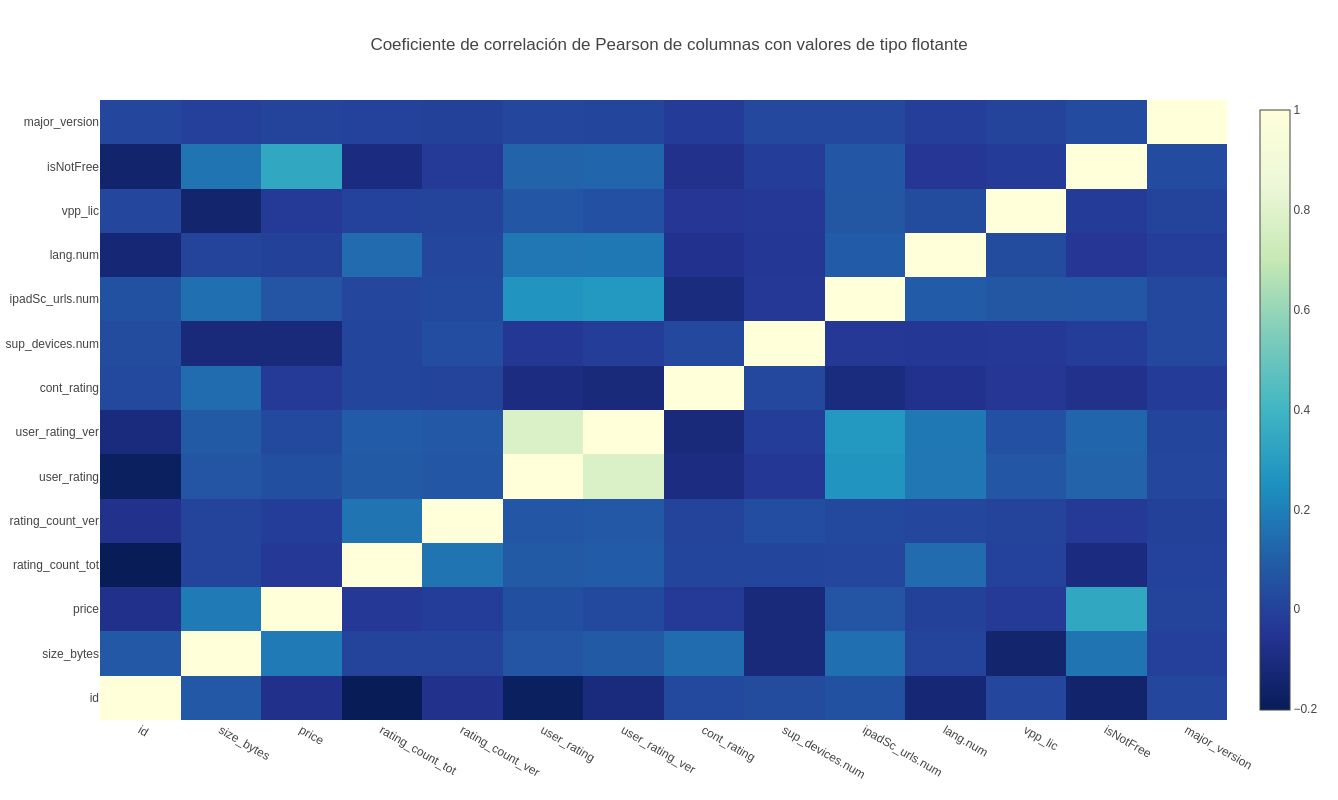

In [36]:
data = [
    go.Heatmap(
        z = m.corr().values,
        x = m.corr().columns.values,
        y = m.corr().columns.values,
        colorscale='YlGnBu',
        reversescale=False,
    )
]

layout = go.Layout(
    title='Coeficiente de correlación de Pearson de columnas con valores de tipo flotante',
    xaxis = dict(ticks=''),
    yaxis = dict(ticks='' ),
    width = 800, height = 800,
    margin = dict(
        l = 100
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')


El coeficiente de correlación de Pearson es la estadística de prueba que mide la relación estadística, o asociación, entre dos variables continuas. Es conocido como el mejor método para medir la asociación entre variables de interés porque se basa en el método de covarianza. Da información sobre la magnitud de la asociación, o correlación, así como la dirección de la relación

### Análisis de la descripción de las apps
Se agregan tres columnas con las tres palabras mas frecuentes en la descripción de las apps, omitiendo stopwords. 

In [37]:
desc = m['app_desc'][0].split(' ')

In [38]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/rozanecm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rozanecm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
%%time
for i in range(m.shape[0]):
    temp_desc = m['app_desc'][i]
    temp_word_list = nltk.word_tokenize(temp_desc)
    temp_word_list = [word.lower() for word in temp_word_list if word not in stopwords.words('english')]
    for char in " {}()#&[]^`´-_·@|¿?¡!'+*\"?.!/;:<>’•“”–»%■,":
        for ele in temp_word_list:
            if char in ele:
                temp_word_list.remove(ele)
    fdist = nltk.FreqDist(temp_word_list)
    temp_srs = pd.Series(fdist).sort_values(ascending=False)
    try:
        m.loc[i, 'most_freq_word_1'] = temp_srs.index[0]
        m.loc[i, 'most_freq_word_2'] = temp_srs.index[1]
        m.loc[i, 'most_freq_word_3'] = temp_srs.index[2]
    except:
        m.loc[i, 'most_freq_word_1'] = temp_srs.index[0]

CPU times: user 4min 52s, sys: 17.7 s, total: 5min 10s
Wall time: 5min 10s


In [40]:
m.tail()

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,...,lang.num,vpp_lic,category,broad_genre,isNotFree,major_version,app_desc,most_freq_word_1,most_freq_word_2,most_freq_word_3
7184,1187617475,kubik,126644224,0.00,142,75,4.5,4.5,1.3,4,...,1,1,Free,Games,0,1,Place the falling blocks correctly in order to...,blocks,falling,layers
7185,1187682390,vr roller-coaster,120760320,0.00,30,30,4.5,4.5,0.9,4,...,1,1,Free,Games,0,0,A thrilling virtual reality roller coaster exp...,vox,virtual,3d
7186,1187779532,bret michaels emojis + lyric keyboard,111322112,1.99,15,0,4.5,0.0,1.0.2,9,...,1,1,Paid,Others,1,1,"Rock star Bret Michaels, winner of Celebrity A...",bret,rock,lyrics
7187,1187838770,vr roller coaster world - virtual reality,97235968,0.00,85,32,4.5,4.5,1.0.15,12,...,2,1,Free,Games,0,1,VR Roller Coaster World is an app for Google C...,vr,world,coaster
7188,1188375727,escape the sweet shop series,90898432,0.00,3,3,5.0,5.0,1.0,4,...,2,1,Free,Games,0,1,5 previous escape games plus 1 new game in one...,game,escape,shop


Text(0.5, 1.0, '3er palabra más frecuente de las apps con rating mayor a 4')

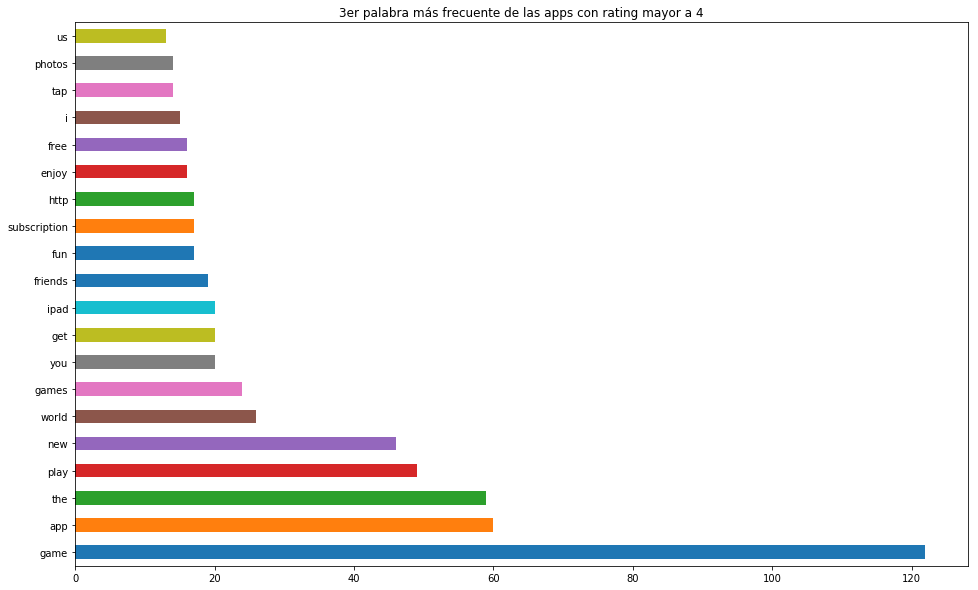

In [41]:
m.loc[m['user_rating'] > 4, 'most_freq_word_3'].value_counts().head(20).plot(kind='barh',figsize=(16,10)).set_title('3er palabra más frecuente de las apps con rating mayor a 4')

## Preparación de datos

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Vamos a definir una columna que clasifique como **aplicaciones exitosas aquellas con user raiting mayor o igual a 4**.

In [43]:
m['succesful'] = apps['user_rating'].apply(lambda x: 1 if x > 3 else 0)    
m.tail(10)

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,...,vpp_lic,category,broad_genre,isNotFree,major_version,app_desc,most_freq_word_1,most_freq_word_2,most_freq_word_3,succesful
7179,1186126548,escape game: illumination,52342784,0.00,23,23,4.5,4.5,1.0,4,...,1,Free,Games,0,1,Escape from here! \n\nTap on the objects in th...,items,look,closer,1.0
7180,1186384912,demolition derby virtual reality (vr) racing,168774656,0.00,18,18,4.0,4.0,1.0.0,12,...,1,Free,Games,0,1,Multiplayer Demolition Derby goes Virtual Real...,vr,racing,car,1.0
7181,1187128255,飞刀传奇-动作武侠热血江湖即时pk传奇（登录爆金装）,537462784,0.99,0,0,0.0,0.0,2.1.0,9,...,1,Paid,Games,1,2,《飞刀传奇》是新一代热血武侠ARPG帮派战斗手游，主打大规模武侠帮派PK的核心玩法，开放【武...,情缘,、,情,0.0
7182,1187279979,add-ons studio for minecraft,22999040,2.99,97,97,3.0,3.0,1.0,4,...,1,Paid,Games,1,1,The makers of the official Minecraft Skin Stud...,minecraft,horse,rabbit,0.0
7183,1187282363,plead the fifth - the game,27853824,2.99,11,0,4.0,0.0,1.1.1,17,...,1,Paid,Games,1,1,"It's the cheeky, provocative, late-night telev...",round,game,scoop,1.0
7184,1187617475,kubik,126644224,0.00,142,75,4.5,4.5,1.3,4,...,1,Free,Games,0,1,Place the falling blocks correctly in order to...,blocks,falling,layers,0.0
7185,1187682390,vr roller-coaster,120760320,0.00,30,30,4.5,4.5,0.9,4,...,1,Free,Games,0,0,A thrilling virtual reality roller coaster exp...,vox,virtual,3d,0.0
7186,1187779532,bret michaels emojis + lyric keyboard,111322112,1.99,15,0,4.5,0.0,1.0.2,9,...,1,Paid,Others,1,1,"Rock star Bret Michaels, winner of Celebrity A...",bret,rock,lyrics,0.0
7187,1187838770,vr roller coaster world - virtual reality,97235968,0.00,85,32,4.5,4.5,1.0.15,12,...,1,Free,Games,0,1,VR Roller Coaster World is an app for Google C...,vr,world,coaster,1.0
7188,1188375727,escape the sweet shop series,90898432,0.00,3,3,5.0,5.0,1.0,4,...,1,Free,Games,0,1,5 previous escape games plus 1 new game in one...,game,escape,shop,1.0


Agregamos la columna que va a definir si es una aplicación exitosa. Como mencionamos antes, son aplicaciones exitosas aquellas con user rating mayor o igual a 4.



***
Eliminamos las columnas ID y category. 

Esta decisión fue tomada porque, para el caso de ID, como se ve en el plot del coeficiente de Perason, la correlación con el resto de los atributos es 0 o menor a 0.

Y para el caso de category, la columna isNotFree representa lo mismo.

In [44]:
m = m.drop(['id', 'category'], axis=1)
m.tail()

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,...,lang.num,vpp_lic,broad_genre,isNotFree,major_version,app_desc,most_freq_word_1,most_freq_word_2,most_freq_word_3,succesful
7184,kubik,126644224,0.00,142,75,4.5,4.5,1.3,4,Games,...,1,1,Games,0,1,Place the falling blocks correctly in order to...,blocks,falling,layers,0.0
7185,vr roller-coaster,120760320,0.00,30,30,4.5,4.5,0.9,4,Games,...,1,1,Games,0,0,A thrilling virtual reality roller coaster exp...,vox,virtual,3d,0.0
7186,bret michaels emojis + lyric keyboard,111322112,1.99,15,0,4.5,0.0,1.0.2,9,Utilities,...,1,1,Others,1,1,"Rock star Bret Michaels, winner of Celebrity A...",bret,rock,lyrics,0.0
7187,vr roller coaster world - virtual reality,97235968,0.00,85,32,4.5,4.5,1.0.15,12,Games,...,2,1,Games,0,1,VR Roller Coaster World is an app for Google C...,vr,world,coaster,1.0
7188,escape the sweet shop series,90898432,0.00,3,3,5.0,5.0,1.0,4,Games,...,2,1,Games,0,1,5 previous escape games plus 1 new game in one...,game,escape,shop,1.0


In [45]:
m.isnull().any()

track_name          False
size_bytes          False
price               False
rating_count_tot    False
rating_count_ver    False
user_rating         False
user_rating_ver     False
ver                 False
cont_rating         False
prime_genre         False
sup_devices.num     False
ipadSc_urls.num     False
lang.num            False
vpp_lic             False
broad_genre         False
isNotFree           False
major_version       False
app_desc            False
most_freq_word_1    False
most_freq_word_2     True
most_freq_word_3     True
succesful            True
dtype: bool

Vemos que tenemos valores nulos en: 
* most_freq_word_2     True
* most_freq_word_3     True
* succesful            True

Vamos a analizar cuántos registros de cada uno son los que cuentan con estos valores nulos

In [46]:
m.succesful.isnull().sum()

8

In [47]:
nan_rows = m[m['succesful'].isnull()]
nan_rows

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,...,lang.num,vpp_lic,broad_genre,isNotFree,major_version,app_desc,most_freq_word_1,most_freq_word_2,most_freq_word_3,succesful
224,the impossible quiz!,44652544,0.00,18884,451,4.0,4.5,1.62,9,Entertainment,...,1,1,Entertainment,0,1,"It’s not the ""difficult quiz"". It’s not the ""r...",quiz,impossible,it,NaN
1133,abrsm aural trainer grades 1-5,329866240,7.99,0,0,0.0,0.0,2.5,4,Education,...,1,1,Education,1,2,The OFFICIAL ABRSM Aural Trainer contains inte...,music,aural,abrsm,NaN
3092,"todo number matrix: brain teasers, logic puzzl...",41566208,0.99,15,5,4.5,4.0,1.1.1,4,Education,...,8,1,Education,1,1,"4.5 stars! ""Todo Number Matrix is a unique mat...",todo,number,children,NaN
3224,萌店-朋友圈的美味生活,85620736,0.00,0,0,0.0,0.0,4.7.0,4,Shopping,...,2,1,Others,0,4,萌店，朋友圈的品质生活！\n萌店成立于2015年3月，是国内领先的移动社交电商平台，专注于美...,地道中国馆,让用户省时省心地品尝全国各地的特色乡味！,和,NaN
3581,green riding hood,316589056,0.00,392,2,4.0,5.0,1.2.1,4,Book,...,12,1,Others,0,1,"* ""Free App of the Week"" in 2017\n* iPad App o...",app,riding,green,NaN
3668,immortal legends - td,273789952,0.00,26,26,3.0,3.0,2.0.0,9,Games,...,3,1,Games,0,2,"Defend your spirit master in epic battles, evo...",heroes,journey,across,NaN
4121,jcnews - anime & game culture,25467904,0.00,0,0,0.0,0.0,2.0.5,17,News,...,31,1,Others,0,2,We'll update the latest news of Japanese anima...,news,◆,you,NaN
4176,ゲームプレイで賞金ゲット！ポットハンター,292899840,0.00,0,0,0.0,0.0,2.1.6,17,Games,...,1,1,Games,0,2,累計賞金200万円突破！「ポットハンター」\n賞金付きゲームアプリの決定版がリニューアルして...,--,ง,▼,NaN


Para el caso de ***succesful*** son solo 8 registros. Al ser tan pocos determinamos directamente eliminar dichos registros

In [48]:
m.most_freq_word_2.isnull().sum()

7

In [49]:
nan_rows = m[m['most_freq_word_2'].isnull()]
nan_rows

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,...,lang.num,vpp_lic,broad_genre,isNotFree,major_version,app_desc,most_freq_word_1,most_freq_word_2,most_freq_word_3,succesful
4899,和我信,97892352,0.00,0,0,0.0,0.0,2.2.1,17,Lifestyle,...,2,1,Others,0,2,和我信是一款基于手机号的一站式服务应用。为个人提供缴话费、查流量、赚流量等通信服务，还能一号...,和我信是一款基于手机号的一站式服务应用。为个人提供缴话费、查流量、赚流量等通信服务，还能一号...,NaN,NaN,1.0
5890,梦幻轩辕,267673600,0.99,0,0,0.0,0.0,10.99,4,Games,...,1,1,Games,1,10,《梦幻轩辕》是由天趣网络开发的一款MMORPG手游，拥有时尚Q萌换装，的大型MMORPG角色...,《梦幻轩辕》是由天趣网络开发的一款mmorpg手游，拥有时尚q萌换装，的大型mmorpg角色...,NaN,NaN,0.0
5982,皮皮四川麻将,67259392,0.00,0,0,0.0,0.0,1.7,17,Games,...,1,1,Games,0,1,最流行的社交游戏平台，与现实中好友一起组局畅玩四川麻将,最流行的社交游戏平台，与现实中好友一起组局畅玩四川麻将,NaN,NaN,1.0
6440,目の錯覚で性格診断,27525120,0.00,0,0,0.0,0.0,1.0.6,4,Entertainment,...,1,1,Entertainment,0,1,右回り左回り、大きい小さい、視覚要因、思い込みや固定概念、本能などの目の錯覚や見え方からあな...,右回り左回り、大きい小さい、視覚要因、思い込みや固定概念、本能などの目の錯覚や見え方からあな...,NaN,NaN,0.0
6765,全民打金币——爽快的正版放置手游,83985408,0.00,0,0,0.0,0.0,1.6,12,Games,...,1,1,Games,0,1,《全民打金币》是一款放置类冒险手游，精美的游戏画面、炫酷流畅的人物技能、彻底解放双手，超乎想...,《全民打金币》是一款放置类冒险手游，精美的游戏画面、炫酷流畅的人物技能、彻底解放双手，超乎想...,NaN,NaN,1.0
7044,迷你世界-国产精品沙盒联机生存建造游戏,106102784,0.00,5,0,3.5,0.0,0.16.3,4,Games,...,2,1,Games,0,0,《迷你世界》是一款高度自由的3D沙盒游戏，这里没有等级和规则限制，这里没有特定的玩法，只有破...,《迷你世界》是一款高度自由的3d沙盒游戏，这里没有等级和规则限制，这里没有特定的玩法，只有破...,NaN,NaN,1.0
7112,js体育资讯,1841152,0.00,0,0,0.0,0.0,1.0,17,Entertainment,...,1,1,Entertainment,0,1,众多篮球足球比赛实时比分报道，最新鲜的体育新闻资讯，让你眼花缭乱，大饱眼福！,众多篮球足球比赛实时比分报道，最新鲜的体育新闻资讯，让你眼花缭乱，大饱眼福！,NaN,NaN,1.0


Para el caso de ***most_freq_word_2*** son solo 7 registros. Al ser tan pocos determinamos directamente eliminar dichos registros

In [50]:
m.most_freq_word_3.isnull().sum()

14

In [51]:
nan_rows = m[m['most_freq_word_3'].isnull()]
nan_rows

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,...,lang.num,vpp_lic,broad_genre,isNotFree,major_version,app_desc,most_freq_word_1,most_freq_word_2,most_freq_word_3,succesful
560,土豆视频hd—高清影视综艺视频播放器,68668416,0.00,990,4,3.0,2.0,5.5.2,12,Entertainment,...,1,1,Entertainment,0,5,土豆视频—每个人都是生活的导演！无论你爱原创、动漫、电视剧，还是音乐、电影或综艺，土豆君汇聚...,土豆视频—每个人都是生活的导演！无论你爱原创、动漫、电视剧，还是音乐、电影或综艺，土豆君汇聚...,国内外大剧热综、扎堆院线大片、二次元热血动漫……就在土豆app,NaN,1.0
1267,上海移动掌上营业厅,61895680,0.00,22,0,3.0,0.0,4.1.8,4,Lifestyle,...,2,1,Others,0,4,上海移动手机营业厅全新改版，我们为您提供更多的业务、优惠活动；让您随时随地了解套餐资源使用情...,赶快下载来体验吧！,上海移动手机营业厅全新改版，我们为您提供更多的业务、优惠活动；让您随时随地了解套餐资源使用情...,NaN,1.0
1285,翼支付-只为简单生活,98640896,0.00,9,0,1.5,0.0,6.1.2,17,Finance,...,1,1,Others,0,6,翼支付是一款提供综合性移动支付业务，生活服务，理财服务的应用；融合了支付、生活服务、社交、理...,翼支付，做你所想。,翼支付是一款提供综合性移动支付业务，生活服务，理财服务的应用；融合了支付、生活服务、社交、理...,NaN,1.0
4899,和我信,97892352,0.00,0,0,0.0,0.0,2.2.1,17,Lifestyle,...,2,1,Others,0,2,和我信是一款基于手机号的一站式服务应用。为个人提供缴话费、查流量、赚流量等通信服务，还能一号...,和我信是一款基于手机号的一站式服务应用。为个人提供缴话费、查流量、赚流量等通信服务，还能一号...,NaN,NaN,1.0
4912,僕の魔球打てるの？,20328448,0.00,0,0,0.0,0.0,2.0,4,Games,...,2,1,Games,0,2,HEY!HEY!HEY!!\nバッタービビってるぅ〜,hey,バッタービビってるぅ〜,NaN,0.0
5503,ひとほろぼし,44026880,0.00,0,0,0.0,0.0,1.1,12,Games,...,1,1,Games,0,1,街をなぎたおして、ひとをほろぼします。\nほろぼした人数はみんなで共有され、着々と増えていきます。,街をなぎたおして、ひとをほろぼします。,ほろぼした人数はみんなで共有され、着々と増えていきます。,NaN,0.0
5890,梦幻轩辕,267673600,0.99,0,0,0.0,0.0,10.99,4,Games,...,1,1,Games,1,10,《梦幻轩辕》是由天趣网络开发的一款MMORPG手游，拥有时尚Q萌换装，的大型MMORPG角色...,《梦幻轩辕》是由天趣网络开发的一款mmorpg手游，拥有时尚q萌换装，的大型mmorpg角色...,NaN,NaN,0.0
5982,皮皮四川麻将,67259392,0.00,0,0,0.0,0.0,1.7,17,Games,...,1,1,Games,0,1,最流行的社交游戏平台，与现实中好友一起组局畅玩四川麻将,最流行的社交游戏平台，与现实中好友一起组局畅玩四川麻将,NaN,NaN,1.0
6440,目の錯覚で性格診断,27525120,0.00,0,0,0.0,0.0,1.0.6,4,Entertainment,...,1,1,Entertainment,0,1,右回り左回り、大きい小さい、視覚要因、思い込みや固定概念、本能などの目の錯覚や見え方からあな...,右回り左回り、大きい小さい、視覚要因、思い込みや固定概念、本能などの目の錯覚や見え方からあな...,NaN,NaN,0.0
6765,全民打金币——爽快的正版放置手游,83985408,0.00,0,0,0.0,0.0,1.6,12,Games,...,1,1,Games,0,1,《全民打金币》是一款放置类冒险手游，精美的游戏画面、炫酷流畅的人物技能、彻底解放双手，超乎想...,《全民打金币》是一款放置类冒险手游，精美的游戏画面、炫酷流畅的人物技能、彻底解放双手，超乎想...,NaN,NaN,1.0


Para el caso de ***most_freq_word_3*** son solo 14 registros. Al ser tan pocos determinamos directamente eliminar dichos registros

In [52]:
m.dropna(inplace=True)
m.isnull().any()

track_name          False
size_bytes          False
price               False
rating_count_tot    False
rating_count_ver    False
user_rating         False
user_rating_ver     False
ver                 False
cont_rating         False
prime_genre         False
sup_devices.num     False
ipadSc_urls.num     False
lang.num            False
vpp_lic             False
broad_genre         False
isNotFree           False
major_version       False
app_desc            False
most_freq_word_1    False
most_freq_word_2    False
most_freq_word_3    False
succesful           False
dtype: bool

***

In [53]:
m['rating_count_previo'] = m['rating_count_tot'] - m['rating_count_ver']

df_train = m[['size_bytes', 'isNotFree', 'price', 'rating_count_previo', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'prime_genre']]
target = m['user_rating']

df_train = pd.get_dummies(df_train)

target = target.apply(lambda x: 1 if x>3 else 0)

X_train, X_test, y_train, y_test = train_test_split(df_train.values, target, test_size=0.2, random_state=1234, stratify=target)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (5733, 31)
X_test shape: (1434, 31)


# Predicciones
Para el presente caso de estudio se eligió utilizar la métrica _Accuracy score_. De la documentación de `sklearn`:

*Accuracy classification score.*
*In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.*

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from keras.models import Sequential

Using TensorFlow backend.


In [55]:
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [56]:
models = [RandomForestClassifier(), LGBMClassifier(), XGBClassifier(), KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)]

kfold = KFold(n_splits=5, random_state=1234)

model_comparison = pd.DataFrame(columns=['Classfier_name', 'train_score', 'test_score'])

for i, model in enumerate(models):
    clf = model
    cv_result = cross_validate(model, X_train, y_train, cv=kfold, scoring='accuracy')
    model_comparison.loc[i, 'Classfier_name'] = model.__class__.__name__
    model_comparison.loc[i, 'train_score'] = cv_result['train_score'].mean()
    model_comparison.loc[i, 'test_score'] = cv_result['test_score'].mean()

model_comparison

,Classfier_name,train_score,test_score
0,RandomForestClassifier,0.989403,0.830283
1,LGBMClassifier,0.917931,0.848944
2,XGBClassifier,0.868176,0.852085
3,KerasClassifier,0.658177,0.65824


# Pred basadas en descripciones

In [57]:
m.loc[:, 'isGame'] = m['app_desc'].apply(lambda x: 1 if 'game' in x.lower() else 0)
m.loc[:, 'descLen'] = m['app_desc'].apply(lambda x: len(x.lower()))

df_train = m[['size_bytes', 'isNotFree', 'price', 'rating_count_previo', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'prime_genre', 'isGame', 'descLen']]
target = m['user_rating']

df_train = pd.get_dummies(df_train)

target = target.apply(lambda x: 1 if x > 3 else 0)

X_train, X_test, y_train, y_test = train_test_split(df_train.values, target, test_size=0.2, random_state=1234, stratify=target)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (5733, 33)
X_test shape: (1434, 33)


In [58]:
model_comparison = pd.DataFrame(columns=['Classfier_name', 'train_score', 'test_score'])

for i, model in enumerate(models):
    clf = model
    cv_result = cross_validate(model, X_train, y_train, cv=kfold, scoring='accuracy')
    model_comparison.loc[i, 'Classfier_name'] = model.__class__.__name__
    model_comparison.loc[i, 'train_score'] = cv_result['train_score'].mean()
    model_comparison.loc[i, 'test_score'] = cv_result['test_score'].mean()

model_comparison

,Classfier_name,train_score,test_score
0,RandomForestClassifier,0.991104,0.843886
1,LGBMClassifier,0.934284,0.853304
2,XGBClassifier,0.877333,0.861329
3,KerasClassifier,0.446402,0.450742


In [59]:
# play a sound when whole notebook finished executing
import os
duration = 1  # second
freq = 1500  # Hz
os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

0